In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

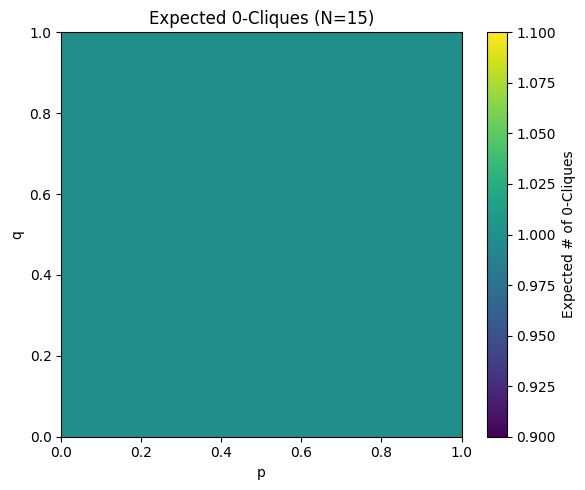

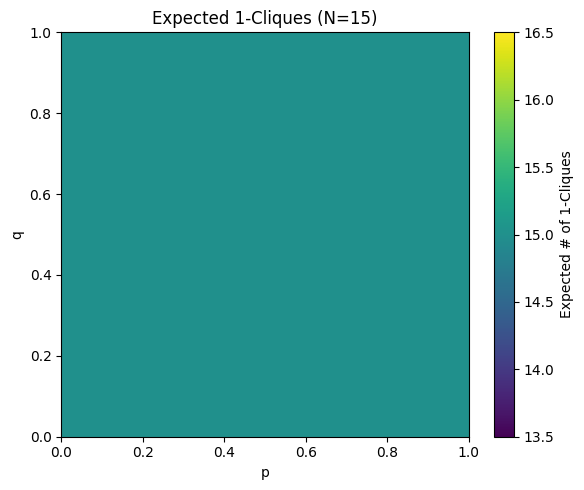

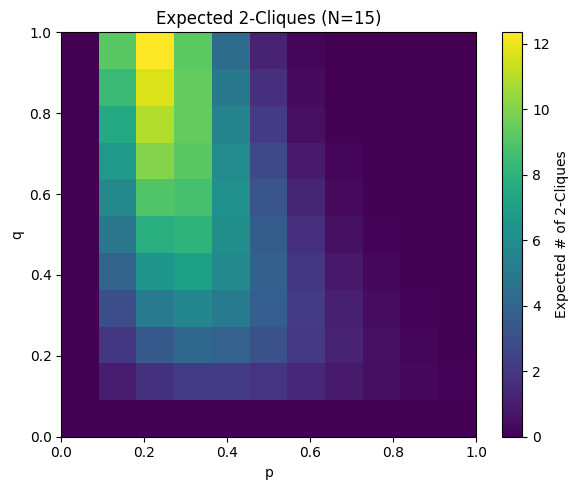

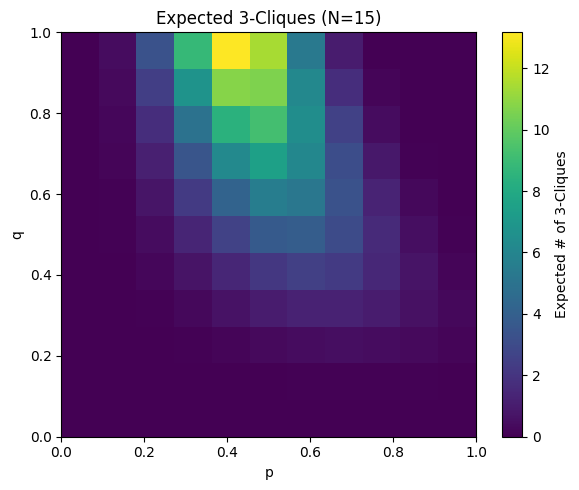

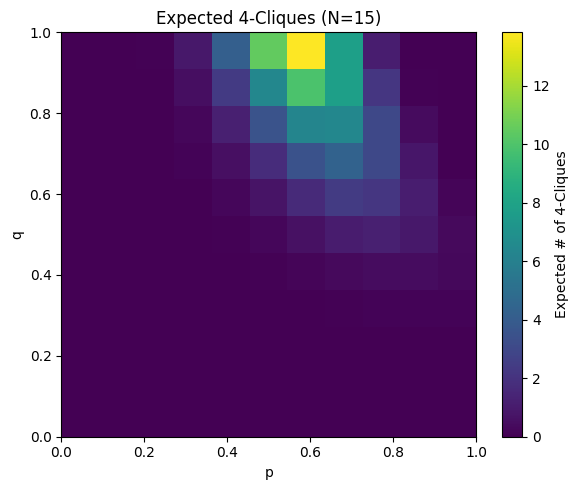

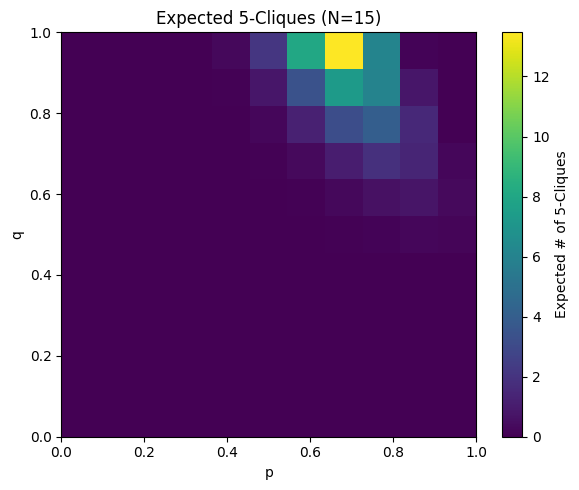

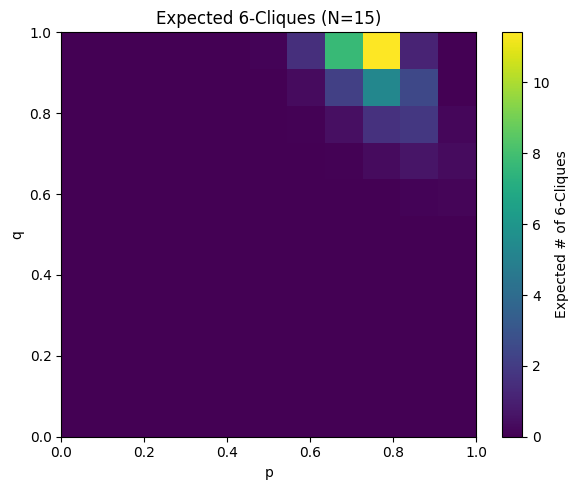

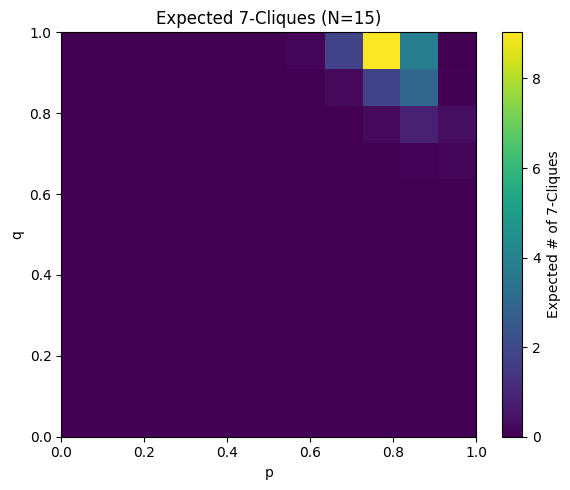

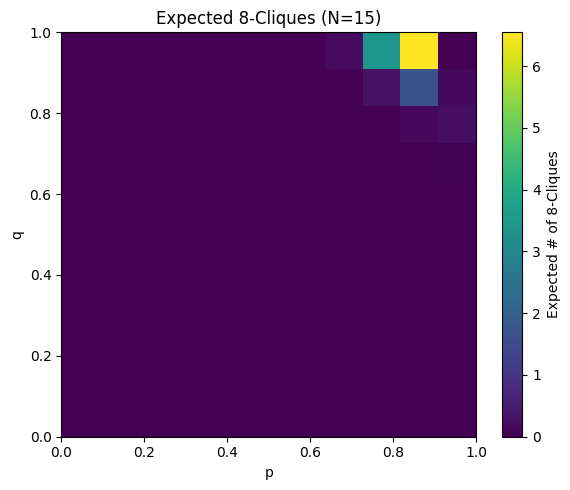

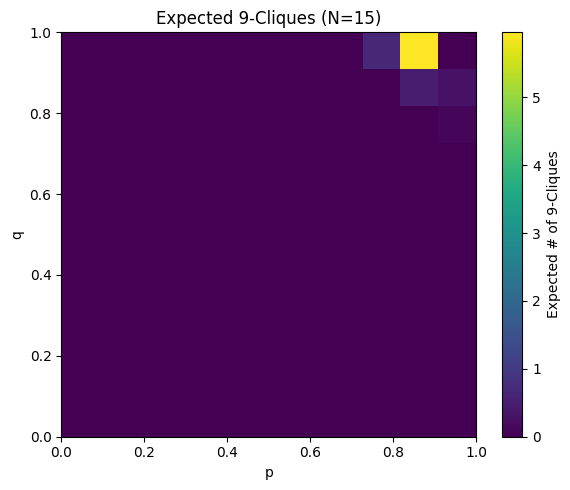

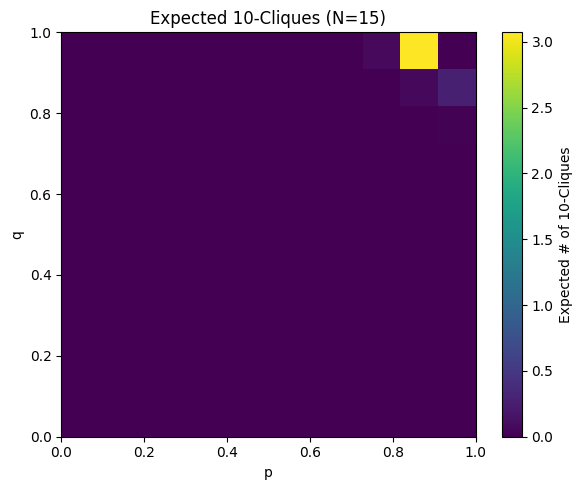

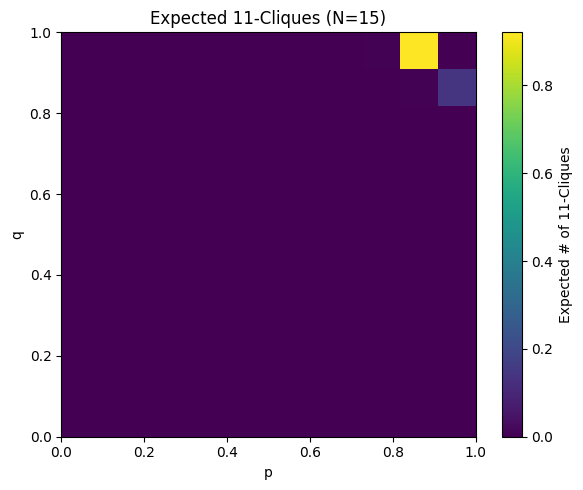

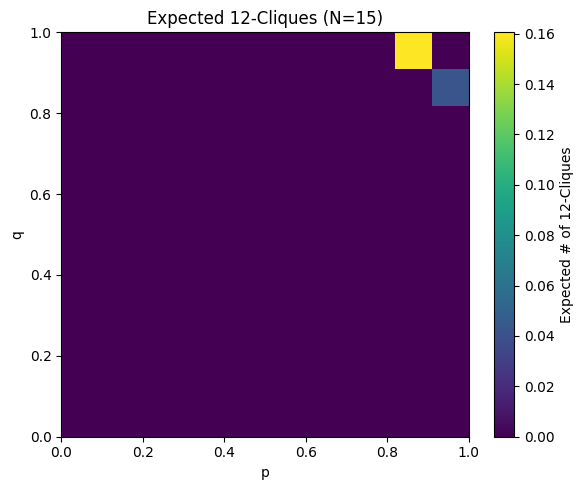

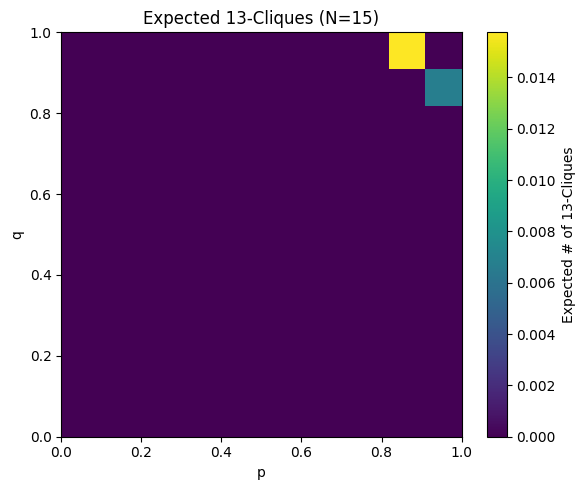

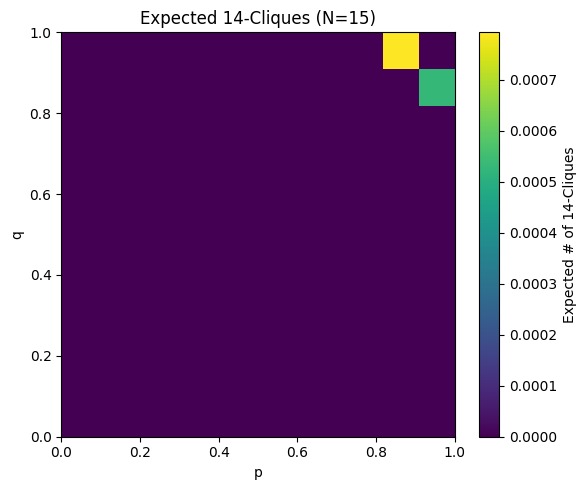

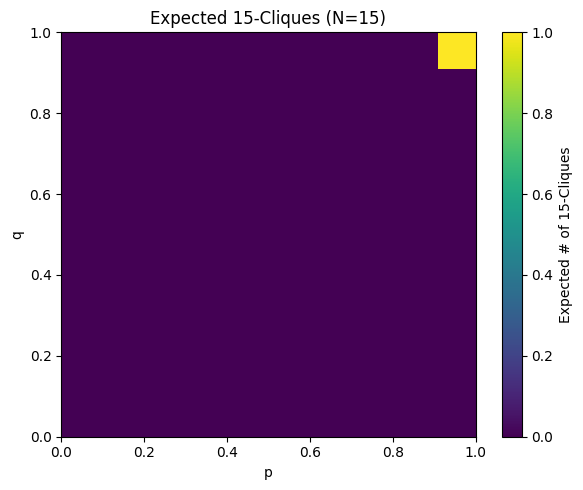

In [3]:
# Set the number of nodes
N = 15  # You can change N

# Define p and q values (0 to 1 in steps of 0.1)
p_values = np.arange(0, 1.01, 0.1)
q_values = np.arange(0, 1.01, 0.1)

# Number of steps in p and q
num_steps = len(p_values)

# Create a 3D array to store expected k-clique values: shape (N+1, len(p_values), len(q_values))
expected_k_cliques = np.zeros((N+1, num_steps, num_steps))

# Loop over all values of p, q, and k
for pi, p in enumerate(p_values):
    for qi, q in enumerate(q_values):
        for k in range(N + 1):
            if k < 2:
                expected = comb(N, k)  # trivial case: cliques of size 0 or 1
            else:
                term1 = comb(N, k)
                term2 = (p * q) ** comb(k, 2)
                inner = (p * q + p * (1 - q) / 2) ** k
                term3 = (1 - inner) ** (N - k)
                expected = term1 * term2 * term3
            expected_k_cliques[k, qi, pi] = expected


# Plot heatmaps for each k
for k in range(N + 1):
    plt.figure(figsize=(6, 5))
    plt.imshow(expected_k_cliques[k], origin='lower', extent=(0, 1, 0, 1), aspect='auto', cmap='viridis')
    plt.colorbar(label='Expected # of {}-Cliques'.format(k))
    plt.title(f'Expected {k}-Cliques (N={N})')
    plt.xlabel('p')
    plt.ylabel('q')
    plt.tight_layout()
    plt.show()


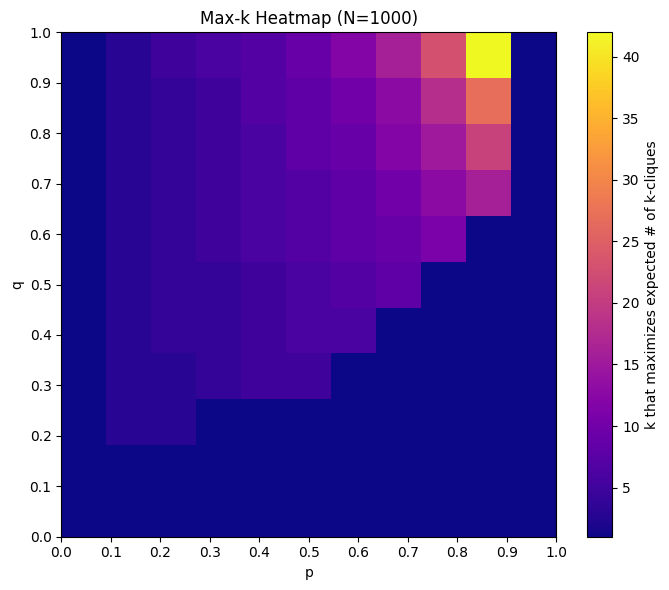

In [4]:
# Parameters
N = 1000
p_values = np.arange(0, 1.01, 0.1)
q_values = np.arange(0, 1.01, 0.1)
num_steps = len(p_values)

# Store expected k-cliques: shape (N+1, len(q), len(p))
expected_k_cliques = np.zeros((N + 1, num_steps, num_steps))

# Fill expected_k_cliques
for pi, p in enumerate(p_values):
    for qi, q in enumerate(q_values):
        for k in range(N + 1):
            if k < 2:
                expected = comb(N, k)
            else:
                term1 = comb(N, k)
                term2 = (p * q) ** comb(k, 2)
                inner = (p * q + p * (1 - q) / 2) ** k
                term3 = (1 - inner) ** (N - k)
                expected = term1 * term2 * term3
            expected_k_cliques[k, qi, pi] = expected  # q as row, p as column

# Find k that maximizes expected number of k-cliques at each (q, p)
max_k_map = np.argmax(expected_k_cliques, axis=0)  # shape: (len(q), len(p))

# Plot heatmap of max k
plt.figure(figsize=(7, 6))
plt.imshow(max_k_map, origin='lower', extent=(0, 1, 0, 1), cmap='plasma', aspect='auto')
plt.colorbar(label='k that maximizes expected # of k-cliques')
plt.xlabel('p')
plt.ylabel('q')
plt.title(f'Max-k Heatmap (N={N})')
plt.xticks(np.round(p_values, 2))
plt.yticks(np.round(q_values, 2))
plt.grid(False)
plt.tight_layout()
plt.show()


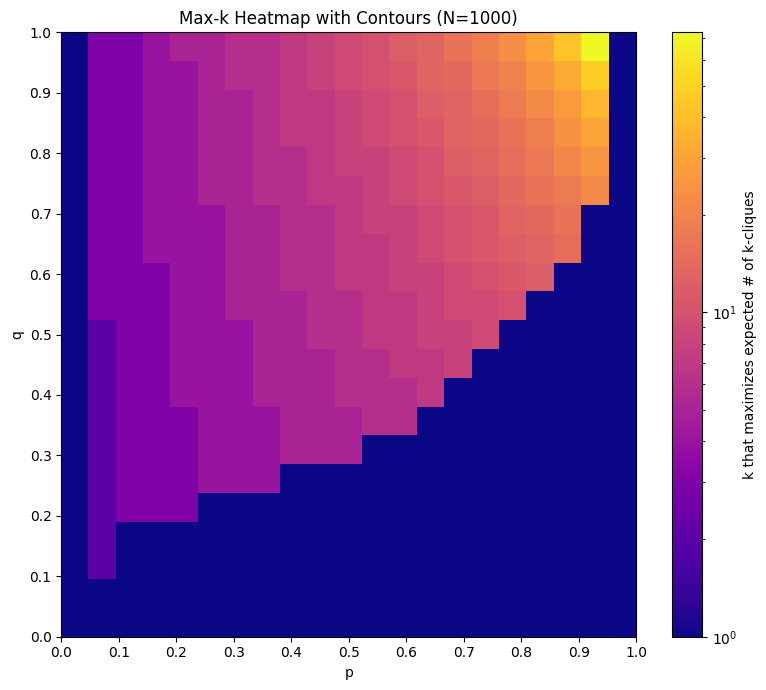

In [5]:
# Parameters
N = 1000
p_values = np.arange(0, 1.01, 0.05)
q_values = np.arange(0, 1.01, 0.05)
num_steps = len(p_values)

# Store expected k-cliques: shape (N+1, len(q), len(p))
expected_k_cliques = np.zeros((N + 1, num_steps, num_steps))

# Fill expected_k_cliques
for pi, p in enumerate(p_values):
    for qi, q in enumerate(q_values):
        for k in range(N + 1):
            if k < 2:
                expected = comb(N, k)
            else:
                term1 = comb(N, k)
                term2 = (p * q) ** comb(k, 2)
                inner = (p * q + p * ((1 - q) / 2)) ** k
                term3 = (1 - inner) ** (N - k)
                expected = term1 * term2 * term3
            expected_k_cliques[k, qi, pi] = expected  # q as row, p as column

# Find k that maximizes expected number of k-cliques at each (q, p)
max_k_map = np.argmax(expected_k_cliques, axis=0)  # shape: (len(q), len(p))

# Plot heatmap of max k
plt.figure(figsize=(8, 7))
img = plt.imshow(max_k_map, origin='lower', extent=(0, 1, 0, 1), cmap='plasma', aspect='auto', norm='log')
plt.colorbar(img, label='k that maximizes expected # of k-cliques')

# # Add contour lines
# P, Q = np.meshgrid(p_values, q_values)
# contour = plt.contour(P, Q, max_k_map, levels=np.arange(N+1), colors='black', linewidths=0.5)
# plt.clabel(contour, inline=True, fontsize=8, fmt='%d')

# Labels and title
plt.xlabel('p')
plt.ylabel('q')
plt.title(f'Max-k Heatmap with Contours (N={N})')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(False)
plt.tight_layout()
plt.show()


C:\Users\avalon\AppData\Local\Temp\ipykernel_28980\1597206866.py:19: RuntimeWarning: invalid value encountered in scalar power
  term5 = (1 - (p * ((1 - q) / 2) + p * q) ** (alpha * N)) ** (N * (1 - alpha))


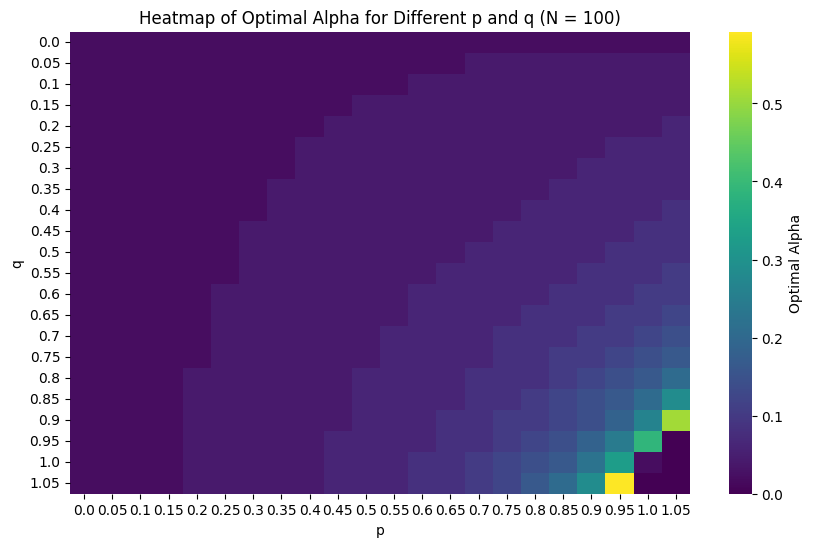

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the expression to evaluate
def expression(N, alpha, p, q):
    epsilon = 1e-10  # Small value to prevent division by zero

    # Terms in the expression
    term1 = np.sqrt(2 * np.pi * N) * (N / np.e) ** N
    term2 = np.sqrt(2 * np.pi * alpha * N) * (alpha * N / np.e) ** (alpha * N)
    term3 = np.sqrt(2 * np.pi * N * (1 - alpha)) * (N * (1 - alpha) / np.e) ** (N * (1 - alpha))
    
    # Prevent division by zero in term2 or term3
    if term2 < epsilon or term3 < epsilon:
        return np.nan  # Return NaN if any of the terms are too small or invalid
    
    term4 = (p * q) ** (alpha * N * (alpha * N - 1) / 2)
    term5 = (1 - (p * ((1 - q) / 2) + p * q) ** (alpha * N)) ** (N * (1 - alpha))

    # Calculate the result
    result = (term1 / (term2 * term3)) * term4 * term5
    return result

# Define the range of p, q, and alpha values
N = 100  # Fixed N value
p_values = np.arange(0, 1.1, 0.02)  # p from 0 to 1 in increments of 0.1
q_values = np.arange(0, 1.1, 0.02)  # q from 0 to 1 in increments of 0.1

# Initialize a matrix to store the optimal alpha values
heatmap_data = np.zeros((len(q_values), len(p_values)))

# For each combination of p and q, find the value of alpha that maximizes the expression
for i, q in enumerate(q_values):
    for j, p in enumerate(p_values):
        # Initialize to store the maximum value and the corresponding alpha
        max_value = -np.inf
        optimal_alpha = 0
        
        # Evaluate expression for different alpha values (from 0 to 1 in 50 increments)
        for alpha in np.linspace(0, 1, 50):
            result = expression(N, alpha, p, q)
            if result > max_value:
                max_value = result
                optimal_alpha = alpha
        
        # Store the optimal alpha for this (p, q) pair
        heatmap_data[i, j] = optimal_alpha

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, xticklabels=np.round(p_values, 2), yticklabels=np.round(q_values, 2), cmap='viridis', cbar_kws={'label': 'Optimal Alpha'})

# Label the plot
plt.xlabel('p')
plt.ylabel('q')
plt.title('Heatmap of Optimal Alpha for Different p and q (N = 100)')
plt.show()


C:\Users\avalon\AppData\Local\Temp\ipykernel_16224\3712842099.py:26: RuntimeWarning: divide by zero encountered in log
  term2 = comb(k, 2) * np.log(p * q)  # log((p * q) ** comb(k, 2))
C:\Users\avalon\AppData\Local\Temp\ipykernel_16224\3712842099.py:32: RuntimeWarning: divide by zero encountered in log
  expected_log = term1 + term2 + k * np.log(p * q + p * (1 - q) / 2) + (N - k) * inner_log


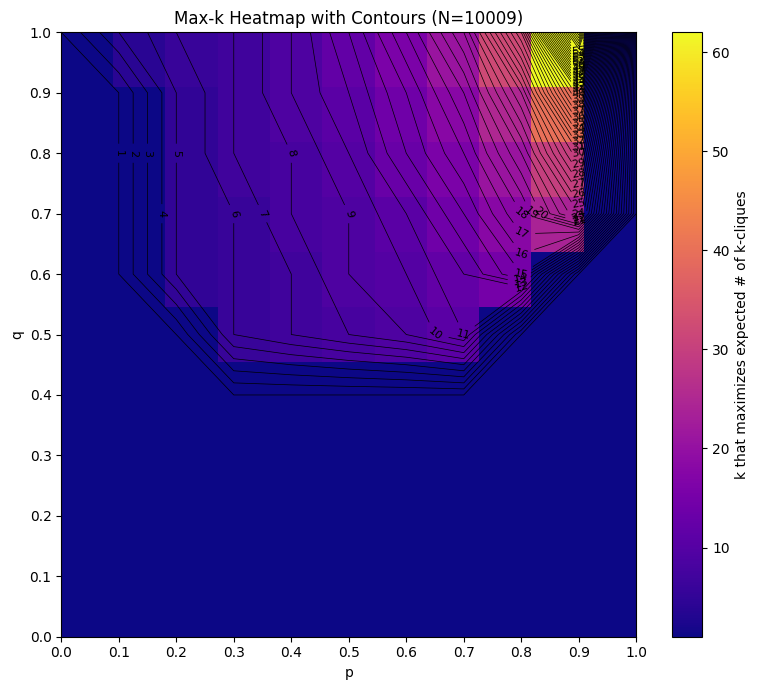

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb, gammaln

# Parameters
N = 10009
p_values = np.arange(0, 1.01, 0.1)
q_values = np.arange(0, 1.01, 0.1)
num_steps = len(p_values)

# Small constant to avoid log(0)
epsilon = 1e-10

# Store expected k-cliques: shape (N+1, len(q), len(p))
expected_k_cliques_log = np.zeros((N + 1, num_steps, num_steps))

# Logarithmic calculation for expected cliques
for pi, p in enumerate(p_values):
    for qi, q in enumerate(q_values):
        for k in range(N + 1):
            if k < 2:
                # Log of combinations C(N, k) = ln(N!) - ln(k!) - ln((N-k)!)
                expected_log = gammaln(N+1) - gammaln(k+1) - gammaln(N-k+1)
            else:
                term1 = gammaln(N+1) - gammaln(k+1) - gammaln(N-k+1)  # log(C(N, k))
                term2 = comb(k, 2) * np.log(p * q)  # log((p * q) ** comb(k, 2))
                
                inner = p * q + p * (1 - q) / 2
                # Prevent log(0) by adding epsilon
                inner_log = np.log(np.maximum(1 - inner**k, epsilon))  # Ensure no log(0)
                
                expected_log = term1 + term2 + k * np.log(p * q + p * (1 - q) / 2) + (N - k) * inner_log

            expected_k_cliques_log[k, qi, pi] = expected_log  # q as row, p as column

# Convert back to normal scale by exponentiating the log values
expected_k_cliques = np.exp(expected_k_cliques_log)

# Find k that maximizes expected number of k-cliques at each (q, p)
max_k_map = np.argmax(expected_k_cliques, axis=0)  # shape: (len(q), len(p))

# Plot heatmap of max k
plt.figure(figsize=(8, 7))
img = plt.imshow(max_k_map, origin='lower', extent=(0, 1, 0, 1), cmap='plasma', aspect='auto')
plt.colorbar(img, label='k that maximizes expected # of k-cliques')

# Add contour lines
P, Q = np.meshgrid(p_values, q_values)
contour = plt.contour(P, Q, max_k_map, levels=np.arange(N+1), colors='black', linewidths=0.5)
plt.clabel(contour, inline=True, fontsize=8, fmt='%d')

# Labels and title
plt.xlabel('p')
plt.ylabel('q')
plt.title(f'Max-k Heatmap with Contours (N={N})')
plt.xticks(np.round(p_values, 2))
plt.yticks(np.round(q_values, 2))
plt.grid(False)
plt.tight_layout()
plt.show()


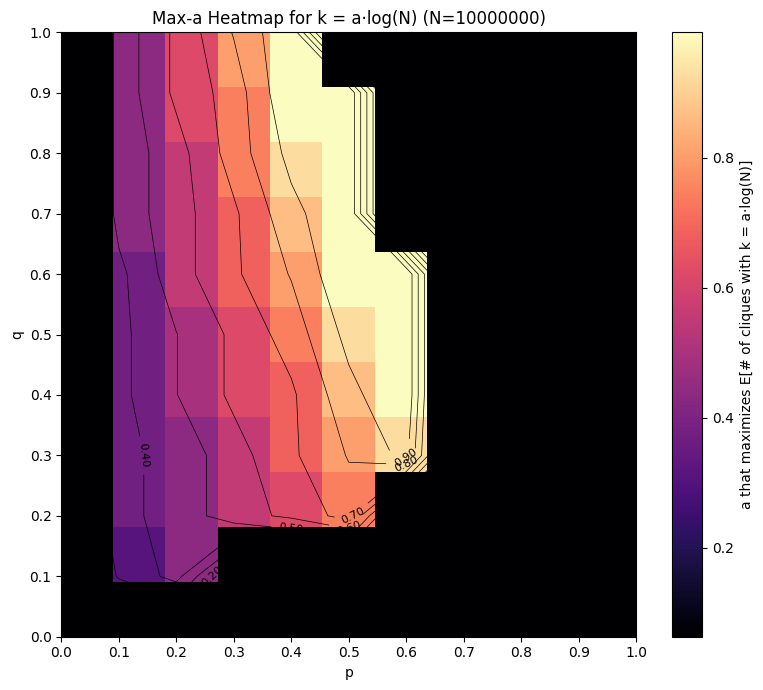

In [34]:
# Parameters
N = 10000000  # Larger N works better for log-scaling
p_values = np.arange(0, 1.01, 0.1)
q_values = np.arange(0, 1.01, 0.1)
a_values = np.linspace(0, 1, 1001)  # a in [0, 1]

# Precompute log(N)
logN = np.log(N)

# Shape: (len(a), len(q), len(p))
expected_k_cliques = np.zeros((len(a_values), len(q_values), len(p_values)))

# Loop over a, p, q
for ai, a in enumerate(a_values):
    k = int(np.floor(a * np.log(N)))
    for pi, p in enumerate(p_values):
        for qi, q in enumerate(q_values):
            if k < 2:
                expected = comb(N, k)
            else:
                term1 = comb(N, k)
                term2 = (p * q) ** comb(k, 2)
                inner = (p * q + p * (1 - q) / 2) ** k
                term3 = (1 - inner) ** (N - k)
                expected = term1 * term2 * term3
            expected_k_cliques[ai, qi, pi] = expected

# Find a that gives the max expected cliques
max_a_indices = np.argmax(expected_k_cliques, axis=0)
max_a_values = a_values[max_a_indices]

# Plot heatmap of max a
plt.figure(figsize=(8, 7))
img = plt.imshow(max_a_values, origin='lower', extent=(0, 1, 0, 1), cmap='magma', aspect='auto')
plt.colorbar(img, label='a that maximizes E[# of cliques with k = a·log(N)]')

# Add contour lines
P, Q = np.meshgrid(p_values, q_values)
contour = plt.contour(P, Q, max_a_values, levels=10, colors='black', linewidths=0.5)
plt.clabel(contour, inline=True, fontsize=8, fmt='%.2f')

# Labels and title
plt.xlabel('p')
plt.ylabel('q')
plt.title(f'Max-a Heatmap for k = a·log(N) (N={N})')
plt.xticks(np.round(p_values, 2))
plt.yticks(np.round(q_values, 2))
plt.grid(False)
plt.tight_layout()
plt.show()


Using p = 0.8, q = 0.01


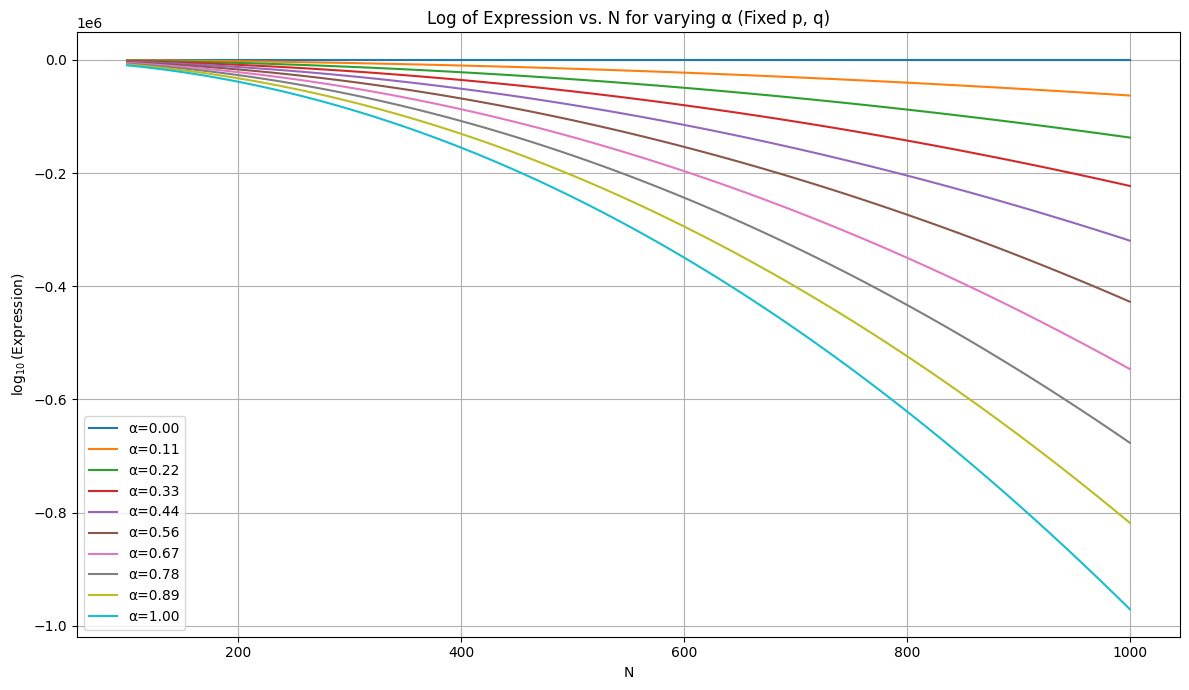

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (fixed p, q)
p = 0.8
q = 0.01
print(f"Using p = {p}, q = {q}")

# Compute x
x = (p / 2) + (p * q / 2)

# N range
N_vals = np.linspace(100, 1000, 100, dtype=int)

# Alpha range from 0 to 1
alpha_vals = np.linspace(0, 1, 10)

plt.figure(figsize=(12, 7))

# Compute and plot the log expression for varying alpha
for alpha in alpha_vals:
    log_expr_vals = []
    for N in N_vals:
        # Take the log of the expression
        numerator_log = np.log(np.sqrt(x)) * (alpha ** 2)
        denominator_log = np.log(1 - x) * (-alpha)
        log_expr = N**2 * (numerator_log - denominator_log)
        log_expr_vals.append(log_expr)

    # Plot for this alpha
    plt.plot(N_vals, log_expr_vals, label=f'α={alpha:.2f}')

# Final plot setup
plt.xlabel('N')
plt.ylabel(r'$\log_{10}$(Expression)')
plt.title('Log of Expression vs. N for varying α (Fixed p, q)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\avalon\AppData\Local\Temp\ipykernel_28980\1970247291.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  result = (term1 / (term2 * term3)) * term4 * term5
C:\Users\avalon\AppData\Local\Temp\ipykernel_28980\1970247291.py:16: RuntimeWarning: invalid value encountered in scalar multiply
  result = (term1 / (term2 * term3)) * term4 * term5


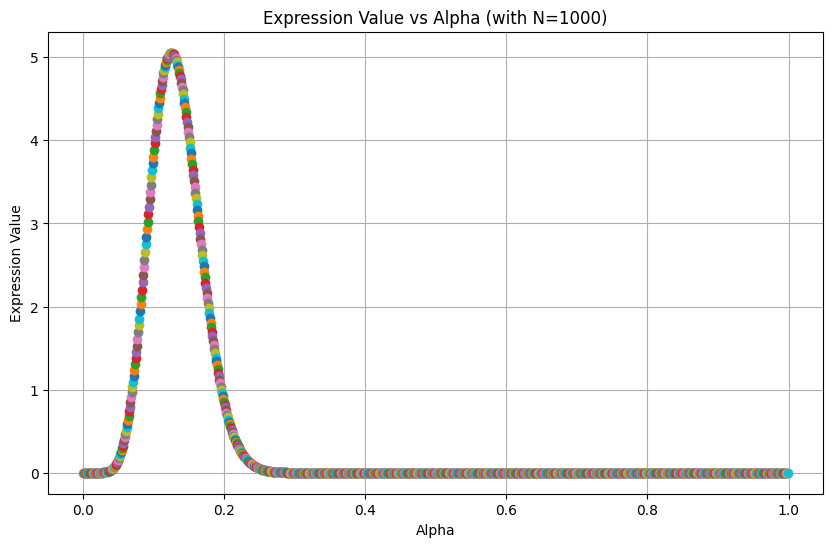

In [84]:
import numpy as np
import matplotlib.pyplot as plt

# User-defined values for p and q
p = 0.2
q = 0.1

# Define the expression to evaluate
def expression(N, alpha, p, q):
    term1 = np.sqrt(2 * np.pi * N) * (N / np.e) ** N
    term2 = np.sqrt(2 * np.pi * alpha * N) * (alpha * N / np.e) ** (alpha * N)
    term3 = np.sqrt(2 * np.pi * N * (1 - alpha)) * (N * (1 - alpha) / np.e) ** (N * (1 - alpha))
    term4 = (p*q) ** (alpha * N * (alpha * N - 1) / 2)
    term5 = (1 - (p * ((1 - q) / 2) + p * q) ** (alpha * N)) ** (N * (1 - alpha))

    result = (term1 / (term2 * term3)) * term4 * term5
    return result

# Set the N value
N = 10

# Create an array of alpha values from 0 to 1 in 10 increments
alpha_values = np.linspace(0, 1, 1111)

# Plotting the expression for different values of alpha
plt.figure(figsize=(10, 6))

for alpha in alpha_values:
    result = expression(N, alpha, p, q)
    plt.plot(alpha, result, 'o', label=f'alpha = {alpha:.1f}')

plt.xlabel('Alpha')
plt.ylabel('Expression Value')
plt.title('Expression Value vs Alpha (with N=1000)')
# plt.legend()
plt.grid(True)
plt.show()


C:\Users\avalon\AppData\Local\Temp\ipykernel_28980\515389949.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  result = (term1 / (term2 * term3)) * term4 * term5
C:\Users\avalon\AppData\Local\Temp\ipykernel_28980\515389949.py:13: RuntimeWarning: invalid value encountered in scalar multiply
  result = (term1 / (term2 * term3)) * term4 * term5
C:\Users\avalon\AppData\Local\Temp\ipykernel_28980\515389949.py:7: RuntimeWarning: overflow encountered in scalar power
  term1 = np.sqrt(2 * np.pi * N) * (N / np.e) ** N
C:\Users\avalon\AppData\Local\Temp\ipykernel_28980\515389949.py:9: RuntimeWarning: overflow encountered in scalar power
  term3 = np.sqrt(2 * np.pi * N * (1 - alpha)) * (N * (1 - alpha) / np.e) ** (N * (1 - alpha))
C:\Users\avalon\AppData\Local\Temp\ipykernel_28980\515389949.py:13: RuntimeWarning: invalid value encountered in scalar divide
  result = (term1 / (term2 * term3)) * term4 * term5
C:\Users\avalon\AppData\Local\Temp\ipykernel_28980\515389949.py:8: Runt

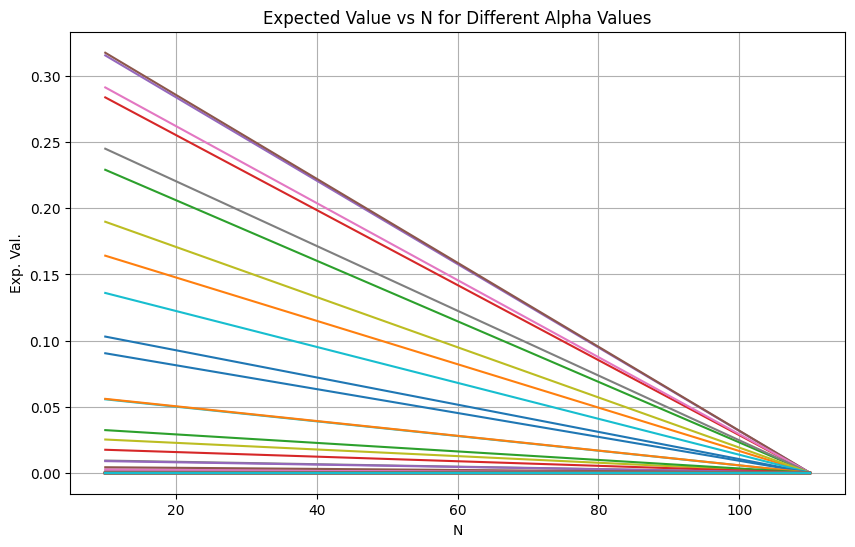

In [91]:
# User-defined values for p and q
p = 0.8
q = 0.01

# Define the expression to evaluate
def expression(N, alpha, p, q):
    term1 = np.sqrt(2 * np.pi * N) * (N / np.e) ** N
    term2 = np.sqrt(2 * np.pi * alpha * N) * (alpha * N / np.e) ** (alpha * N)
    term3 = np.sqrt(2 * np.pi * N * (1 - alpha)) * (N * (1 - alpha) / np.e) ** (N * (1 - alpha))
    term4 = (p*q) ** (alpha * N * (alpha * N - 1) / 2)
    term5 = (1 - (p * ((1 - q) / 2) + p * q) ** (alpha * N)) ** (N * (1 - alpha))

    result = (term1 / (term2 * term3)) * term4 * term5
    return result

# Define N values to plot
N_values = np.arange(10, 2000, 100) 

# Create a figure to plot
plt.figure(figsize=(10, 6))

# Plot for different values of alpha (from 0 to 1 in 10 increments)
for alpha in np.linspace(0, 1, 101):
    results = [expression(N, alpha, p, q) for N in N_values]
    plt.plot(N_values, results, label=f'alpha = {alpha:.1f}')

# Label the plot
plt.xlabel('N')
plt.ylabel('Exp. Val.')
plt.title('Expected Value vs N for Different Alpha Values')
# plt.legend()
plt.grid(True)
plt.show()


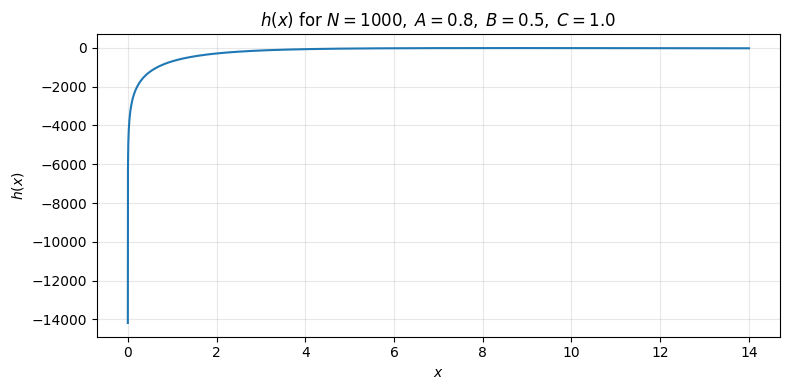

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# ------------------------------------------------------------------
# 1. --- PARAMETERS -------------------------------------------------
# ------------------------------------------------------------------
N = 1000          # integer ≥ 2
A = 0.8          # 0 < A ≤ 1
B = 0.5          # 0 < B < 1
C = 1.0          # any positive constant; log(C) is a vertical shift

# --- domain checks -------------------------------------------------
if not (0.0 < A <= 1.0):
    sys.exit("A must satisfy 0 < A ≤ 1")
if not (0.0 < B < 1.0):
    sys.exit("B must satisfy 0 < B < 1")
if N < 2 or int(N) != N:
    sys.exit("N must be an integer ≥ 2")
if C <= 0:
    sys.exit("C must be > 0")

# ------------------------------------------------------------------
# 2. --- COMPONENT FUNCTIONS ---------------------------------------
# ------------------------------------------------------------------
def h1(x, N):
    return N * np.log(N / np.e) / (x * np.log(x / np.e) +
                                   (N - x) * np.log((N - x) / np.e))

def h2(x, A):
    return 0.5 * x * (x - 1) * np.log(A)

def h3(x, N, B):
    return (N - x) * np.log(1 - B**x)

def h(x, N, A, B, C):
    return np.log(C) + h1(x, N) + h2(x, A) + h3(x, N, B)

# ------------------------------------------------------------------
# 3. --- GRID (avoid log-singularities at x=0 and x=N) --------------
# ------------------------------------------------------------------
bound = round(2*(np.log(N)))
x_vals = np.linspace(1e-6, bound - 1e-6, 4000) # 0 < x < N
y_vals = h(x_vals, N, A, B, C)

# ------------------------------------------------------------------
# 4. --- PLOT -------------------------------------------------------
# ------------------------------------------------------------------
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals)
plt.title(r"$h(x)$ for $N={},\;A={},\;B={},\;C={}$".format(N, A, B, C))
plt.xlabel(r"$x$")
plt.ylabel(r"$h(x)$")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
